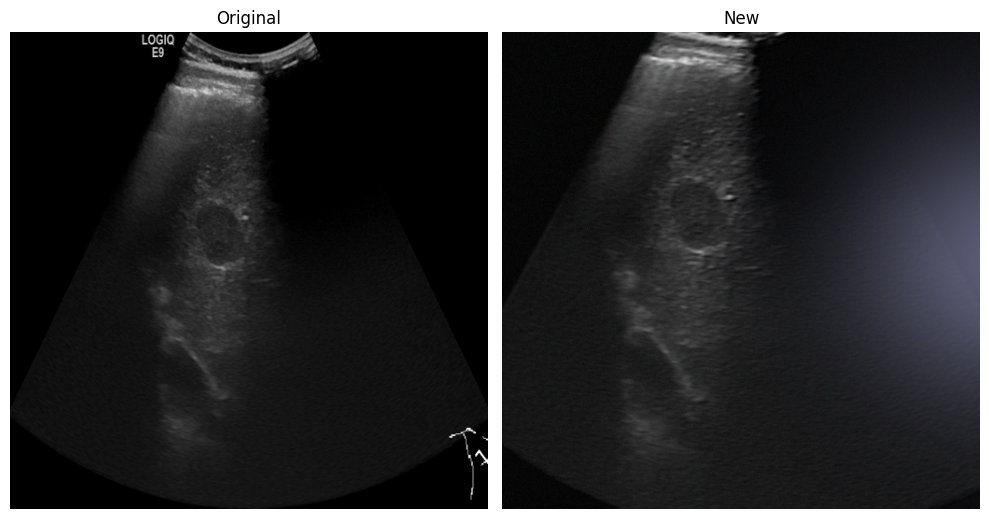

In [5]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import random
import albumentations as A
import os
import skimage


def create_blurred_circle(width, height, center_x, center_y, radius, blur_size, color, p=0.5):
    image = Image.new("RGBA", (width, height), (0, 0, 0, 0))

    # Create a drawing context
    draw = ImageDraw.Draw(image)

    # Calculate the bounding box for the circle
    left = center_x - radius
    top = center_y - radius
    right = center_x + radius
    bottom = center_y + radius

    if np.random.randn() < p:
        # Generate random values for color adjustment
        hue_shift = random.randint(-5, 5)
        sat_shift = random.randint(-10, 10)
        val_shift = random.randint(-5, 5)

        # Adjust the RGB color values
        color = (
            max(0, min(255, color[0] + hue_shift)),
            max(0, min(255, color[1] + sat_shift)),
            max(0, min(255, color[2] + val_shift))
        )

    # Draw the circle with a color
    draw.ellipse((left, top, right, bottom), fill=color)

    # Apply Gaussian blur to the image
    blurred_image = image.filter(ImageFilter.GaussianBlur(blur_size))

    return blurred_image

IMG_SIZE = 512 # Don't change !!!
COLORS_SPACE = [(192, 181, 173), (120, 119, 87), (182, 184, 176), (152, 154, 196)]
POSITION_SPACE = [
    (0, 0, "Left upper corner"),  
    (0, IMG_SIZE, "Left lower corner"), 
    (IMG_SIZE, 0, "Right upper corner"), 
    (IMG_SIZE, IMG_SIZE, "Right lower corner"), 
    (0, IMG_SIZE // 2, "Left mid"),
    (IMG_SIZE, IMG_SIZE // 2, "Right mid"),
    (IMG_SIZE // 2, 0, "Top mid"), 
    (IMG_SIZE // 2, IMG_SIZE, "Bottom mid"), 
    ]
INTENSITY = [ # (radius, blur_size)
    (190, 70, "Very high reflect"), 
    (170, 110, "Mediam reflect"),
    (200, 160, "Light fog"),
    (220, 120, "Heavy fog"),
    ]

rand_img = random.choice(os.listdir("../dataset/training_data/images/train/"))
base_image = Image.open(f"../dataset/training_data/images/train/{rand_img}").resize((IMG_SIZE, IMG_SIZE))
width, height = base_image.size

if len(np.array(base_image).shape) != 3:
    base_image = skimage.color.gray2rgb(np.array(base_image))
    base_image = Image.fromarray(base_image)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(base_image)
axes[0].axis(False)
axes[0].set_title("Original")

transform_img = A.Compose(
    [   
        A.Perspective(scale=(0.05, 0.09), p=1),
        A.RandomBrightnessContrast(brightness_limit=(-0.05, 0.1), contrast_limit=(-0.05, 0.1), p=1),
        A.Emboss(alpha=(0.3, 0.9), strength=(0.3, 0.8), p=1),
        A.MotionBlur(blur_limit=(3, 5), p=1),
        A.ISONoise(color_shift=(0.01, 0.03), intensity=(0.1, 0.3), p=1),
        A.GaussNoise(var_limit=(1, 5), p=1),
        A.Spatter(gauss_sigma=(0.25, 0.4), cutout_threshold=(0.7, 1), intensity=(0.3, 0.6), color=(255, 255, 255), p=0.5),
        A.ImageCompression(p=1),
    ],
)
base_image = transform_img(image=np.array(base_image))["image"]
base_image = Image.fromarray(base_image)

num_circle = random.randint(1, 4)

for _ in range(num_circle):
    p_position = list(random.choice(POSITION_SPACE))
    POSITION_SPACE.remove(tuple(p_position))
    margin = random.randrange(-50, 51, 10)
    
    if p_position[2] in ["Left mid", "Right mid"]:
        p_position[1] += margin
    elif p_position[2] in ["Top mid", "Bottom mid"]:
        p_position[0] += margin
    else:
        p_position[random.randint(0, 1)] += margin

    p_intense = list(random.choice(INTENSITY))
    fog_margin = random.randrange(-5, 6, 1)
    p_intense[random.randint(0, 1)] += fog_margin

    
    params = dict(
        width = width,
        height = height,
        center_x = p_position[0],
        center_y = p_position[1],
        radius = p_intense[0],
        blur_size = p_intense[1],
        color = random.choice(COLORS_SPACE)
    )

    blurred_circle = create_blurred_circle(**params)
    base_image.paste(blurred_circle, (0, 0), blurred_circle)


axes[1].imshow(base_image)
axes[1].axis(False)
axes[1].set_title("New")

plt.tight_layout()
plt.show()

# Create function and add prob control

In [6]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import random
import albumentations as A
import os
import skimage

def create_synthesized_img(path: str, p: float) -> Image:

    IMG_SIZE = 512 # Don't change !!!
    COLORS_SPACE = [(192, 181, 173), (120, 119, 87), (182, 184, 176), (152, 154, 196)]
    POSITION_SPACE = [
        (0, 0, "Left upper corner"),  
        (0, IMG_SIZE, "Left lower corner"), 
        (IMG_SIZE, 0, "Right upper corner"), 
        (IMG_SIZE, IMG_SIZE, "Right lower corner"), 
        (0, IMG_SIZE // 2, "Left mid"),
        (IMG_SIZE, IMG_SIZE // 2, "Right mid"),
        (IMG_SIZE // 2, 0, "Top mid"), 
        (IMG_SIZE // 2, IMG_SIZE, "Bottom mid"), 
        ]
    INTENSITY = [ # (radius, blur_size)
        (190, 70, "Very high reflect"), 
        (170, 110, "Mediam reflect"),
        (200, 160, "Light fog"),
        (220, 120, "Heavy fog"),
        ]
    
    if np.random.randn() < p:
        def create_blurred_circle(width, height, center_x, center_y, radius, blur_size, color):
            image = Image.new("RGBA", (width, height), (0, 0, 0, 0))

            # Create a drawing context
            draw = ImageDraw.Draw(image)

            # Calculate the bounding box for the circle
            left = center_x - radius
            top = center_y - radius
            right = center_x + radius
            bottom = center_y + radius

            if np.random.randn() < 0.5:
                # Generate random values for color adjustment
                hue_shift = random.randint(-5, 5)
                sat_shift = random.randint(-10, 10)
                val_shift = random.randint(-5, 5)

                # Adjust the RGB color values
                color = (
                    max(0, min(255, color[0] + hue_shift)),
                    max(0, min(255, color[1] + sat_shift)),
                    max(0, min(255, color[2] + val_shift))
                )

            # Draw the circle with a color
            draw.ellipse((left, top, right, bottom), fill=color)

            # Apply Gaussian blur to the image
            blurred_image = image.filter(ImageFilter.GaussianBlur(blur_size))

            return blurred_image
            
        base_image = Image.open(path).resize((IMG_SIZE, IMG_SIZE))
        width, height = base_image.size

        if len(np.array(base_image).shape) != 3:
            base_image = skimage.color.gray2rgb(np.array(base_image))
            base_image = Image.fromarray(base_image)

        transform_img = A.Compose(
            [   
                A.Perspective(scale=(0.05, 0.09), p=0.5),
                A.RandomBrightnessContrast(brightness_limit=(-0.05, 0.1), contrast_limit=(-0.05, 0.1), p=1),
                A.Emboss(alpha=(0.3, 0.9), strength=(0.3, 0.8), p=1),
                A.MotionBlur(blur_limit=(3, 5), p=1),
                A.ISONoise(color_shift=(0.01, 0.03), intensity=(0.1, 0.3), p=1),
                A.GaussNoise(var_limit=(1, 5), p=1),
                A.Spatter(gauss_sigma=(0.25, 0.4), cutout_threshold=(0.7, 1), intensity=(0.3, 0.6), color=(255, 255, 255), p=0.5),
                A.ImageCompression(p=1),
            ],
        )
        base_image = transform_img(image=np.array(base_image))["image"]
        base_image = Image.fromarray(base_image)

        num_circle = random.randint(1, 4)

        for _ in range(num_circle):
            p_position = list(random.choice(POSITION_SPACE))
            POSITION_SPACE.remove(tuple(p_position))
            margin = random.randrange(-50, 51, 10)
            
            if p_position[2] in ["Left mid", "Right mid"]:
                p_position[1] += margin
            elif p_position[2] in ["Top mid", "Bottom mid"]:
                p_position[0] += margin
            else:
                p_position[random.randint(0, 1)] += margin

            p_intense = list(random.choice(INTENSITY))
            fog_margin = random.randrange(-5, 6, 1)
            p_intense[random.randint(0, 1)] += fog_margin

            
            params = dict(
                width = width,
                height = height,
                center_x = p_position[0],
                center_y = p_position[1],
                radius = p_intense[0],
                blur_size = p_intense[1],
                color = random.choice(COLORS_SPACE)
            )

            blurred_circle = create_blurred_circle(**params)
            base_image.paste(blurred_circle, (0, 0), blurred_circle)

        return base_image
    else:
        base_image = Image.open(path).resize((IMG_SIZE, IMG_SIZE))

        return base_image

# Create artfact dataset

In [17]:
import pandas as pd

In [22]:
mapp = pd.read_excel("../csv/mapping.xlsx")
machine = mapp[mapp['Source'] == 'machine']
machine

,Image File,Annotation File,Source,Type
0,24084.jpg,24084.txt,machine,machine_positive
1,97528.jpg,97528.txt,machine,machine_positive
2,54563.jpg,54563.txt,machine,machine_positive
3,115211.jpg,115211.txt,machine,machine_positive
4,71913.jpg,71913.txt,machine,machine_positive
...,...,...,...,...
17993,41611.jpg,NaN,machine,machine_negative
17994,95326.jpg,NaN,machine,machine_negative
17995,140547.jpg,NaN,machine,machine_negative
17996,32827.jpg,NaN,machine,machine_negative


In [27]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(machine, test_size=0.01, random_state=8888)
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (17818, 4)
Test data shape: (180, 4)


# Gen Artifact

In [58]:
from tqdm.auto import tqdm
import os

os.makedirs("../new_dataset/Artifact_img/", exist_ok=True)

for idx, row in tqdm(train_data.iterrows(), total=len(train_data)):
    try:
        path = f"../dataset/training_data/images/train/{row['Image File']}"
        artifact_image = create_synthesized_img(path, p=0.7)
    except:
        path = f"../dataset/training_data/images/val/{row['Image File']}"
        artifact_image = create_synthesized_img(path, p=0.7)

    # artifact_image = create_synthesized_img(path, p=0.7)

    artifact_image.save(f"../new_dataset/Artifact_img/gen_{row['Image File']}")


  0%|          | 0/17818 [00:00<?, ?it/s]

In [33]:
directory = '../new_dataset/US_liver_data'
file_artifact_list = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            file_artifact_list.append(filename)

print(file_artifact_list[:5])

['gen_87401.jpg', 'gen_143362.jpg', 'gen_6757.jpg', 'gen_77863.jpg', 'gen_114779.jpg']


In [34]:
len(file_artifact_list)

17818

In [38]:
mapp[mapp['Source'] == 'machine']

,Image File,Annotation File,Source,Type
0,24084.jpg,24084.txt,machine,machine_positive
1,97528.jpg,97528.txt,machine,machine_positive
2,54563.jpg,54563.txt,machine,machine_positive
3,115211.jpg,115211.txt,machine,machine_positive
4,71913.jpg,71913.txt,machine,machine_positive
...,...,...,...,...
17993,41611.jpg,NaN,machine,machine_negative
17994,95326.jpg,NaN,machine,machine_negative
17995,140547.jpg,NaN,machine,machine_negative
17996,32827.jpg,NaN,machine,machine_negative


In [ ]:
machine_list = mapp[mapp['Source'] == 'machine']['Annotation File'].tolist()

In [53]:
machine_list = [item for item in machine_list if str(item).lower() not in ['nan', 'NaN']]
print(len(machine_list))

8998


In [54]:
for i in machine_list:
    if type(i) != str:
        print(i)
        break

In [55]:
import os
import shutil
from tqdm import tqdm

os.makedirs("../new_dataset/labels_artifact/", exist_ok=True)

dir1_train = '../dataset/training_data/labels/train'
dir1_val = '../dataset/training_data/labels/val'
dir2 = "../new_dataset/labels_artifact"

for txt_name in tqdm(machine_list):
    try:      
        source_path = os.path.join(dir1_train, txt_name)
        with open(source_path, 'r') as file:
            file_contents = file.read()
    except FileNotFoundError:  # Catching the specific exception
        source_path = os.path.join(dir1_val, txt_name)
        with open(source_path, 'r') as file:
            file_contents = file.read()
            
    destination_path = os.path.join(dir2, f"gen_{txt_name}")  # Modified this line
    
    shutil.copy(source_path, destination_path)


100%|██████████| 8998/8998 [00:12<00:00, 694.69it/s]


## Go To preprocess.ipynb